# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_count = pyber_data_df.groupby(["type"]).count()['ride_id']
total_rides_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_count = city_data_df.groupby(["type"]).sum()['driver_count']
total_drivers_count.head()



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_amount = pyber_data_df.groupby(["type"]).sum()['fare']
total_amount.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = pyber_data_df.groupby(["type"]).mean()['fare']
avg_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fares_per_driver_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
average_fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": total_rides_count,
          "Total Drivers": total_drivers_count,
          "Total Fares": total_amount,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": average_fares_per_driver_by_type})

pyber_summary_df

Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
type                                                                       
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average Fare per Driver  
type                               
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

Total Rides  Total Drivers Total Fares Average Fare per Ride  \
Rural             125             78    $4327.93                $34.62   
Suburban          625            490   $19356.33                $30.97   
Urban            1625           2405   $39854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


# Rename columns in combined ride dataframe
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df

# Set the index to the data
pyber_data_df = pyber_data_df.set_index(['Date'])

# Make a copy with fewer columns
pyber_data_df_copy = pyber_data_df.copy()[['Fare', 'City Type']]
pyber_data_df_copy

# Change the datatype of the index to datetime
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.info()

# Create a new dateframe grouped by city type and date
pyber_data_df_fare_by_type = pd.DataFrame(pyber_data_df_copy.groupby(['City Type', 'Date']).sum()['Fare'])
pyber_data_df_fare_by_type.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df_fare_by_type = pyber_data_df_fare_by_type.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot = pd.pivot_table(pyber_data_df_fare_by_type, values="Fare", index=["Date"], columns=['City Type'])
pyber_pivot.head(10)

City Type            Rural  Suburban  Urban
Date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
2019-01-01 09:45:36  43.69       NaN    NaN
2019-01-01 12:32:48    NaN     25.56    NaN
2019-01-01 14:40:14    NaN       NaN   5.42
2019-01-01 14:42:25    NaN       NaN  12.31
2019-01-01 14:52:06    NaN     31.15    NaN

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-29']
pyber_pivot_df.tail()

City Type            Rural  Suburban  Urban
Date                                       
2019-04-29 20:54:19    NaN       NaN  28.41
2019-04-29 21:20:41    NaN       NaN  13.59
2019-04-29 22:08:22    NaN     25.75    NaN
2019-04-29 23:05:04    NaN       NaN  14.59
2019-04-29 23:10:18    NaN     29.39    NaN

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_pivot_df_weekly = pyber_pivot_df.resample('W').sum()
pyber_pivot_df_weekly

City Type    Rural  Suburban    Urban
Date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29
2019-05-05   67.60    167.92   342.63

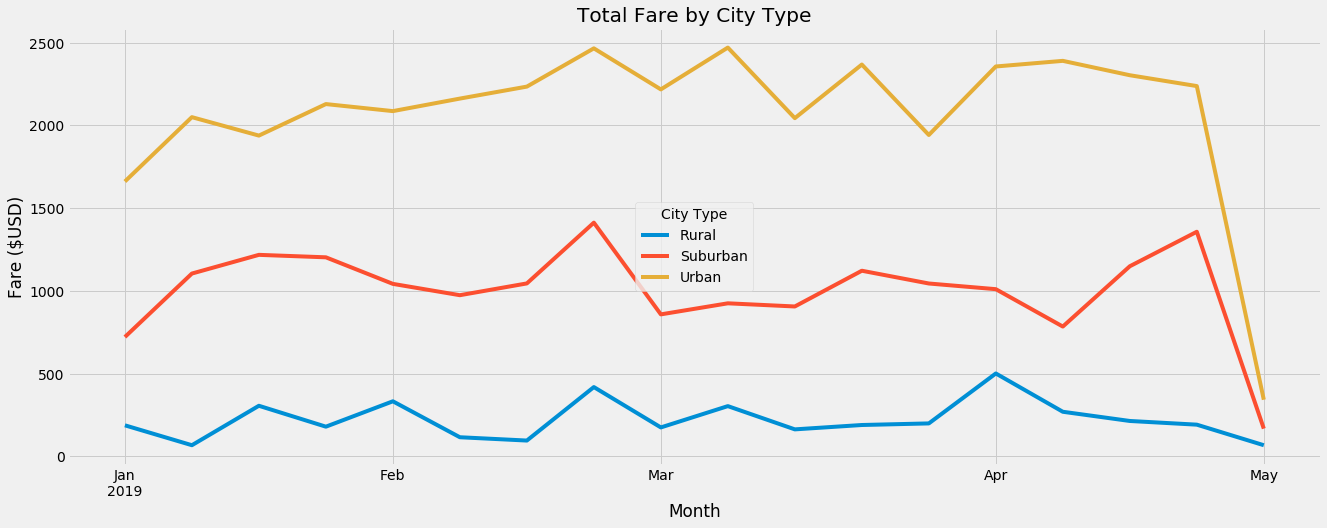

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


# Create a plot
ax = pyber_pivot_df_weekly.plot(figsize=(20, 7.5))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")

# Save plot to analysis folder
plt.savefig("analysis/pyber_challenge.png")

plt.show()
